# Capstone Project
##### Author : Syed Abdul Wasay

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling, Identifying and handling missing values

In [35]:
# reading the source file
df_source = pd.read_csv(r"C:\Users\ulixe\Desktop\My_Docs\IBM_Coursera\9.AppliedDataScienceCapstoneProject\Data-Collisions.csv")

c:\users\ulixe\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
print(df_source.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [12]:
df_source.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [37]:
missing_data = df_source.isnull()

In [38]:
# This block of code shows missing data on each column of the source dataset

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

### Feature selection and Exploratory Data Analysis

In [39]:
df = df_source[['SEVERITYCODE','ADDRTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND','LIGHTCOND', 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT','SEVERITYDESC', 'COLLISIONTYPE']]

In [40]:
df.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
SEVERITYDESC        0
COLLISIONTYPE    4904
dtype: int64

In [41]:
df.shape

(194673, 12)

In [42]:
df.dropna(axis=0,how='any',inplace=True)

<ipython-input-42-c506f1976239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,how='any',inplace=True)


In [43]:
df.shape

(182895, 12)

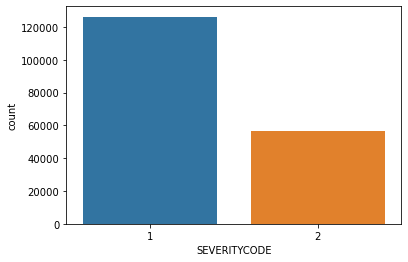

In [44]:
# Looking at our Traget variable SEVERITYCODE 1 represents proper damage and SEVERITYCODE 2 equals an Injury

sns.countplot(df['SEVERITYCODE'], data = df)

In [45]:
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("") 

SEVERITYCODE
1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           119362
Intersection     63298
Alley              235
Name: ADDRTYPE, dtype: int64

JUNCTIONTYPE
Mid-Block (not related to intersection)              86609
At Intersection (intersection related)               61206
Mid-Block (but intersection related)                 22341
Driveway Junction                                    10519
At Intersection (but not related to intersection)     2055
Ramp Junction                                          160
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

WEATHER
Clear                       109059
Raining                      32642
Overcast                     27183
Unknown                      11637
Snowing                        881
Other                          746
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Par

In [46]:
numerical = ['PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT','VEHCOUNT','SEVERITYCODE']
categorical = ['SEVERITYDESC','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']
df = df[numerical + categorical]
df.shape

(182895, 12)

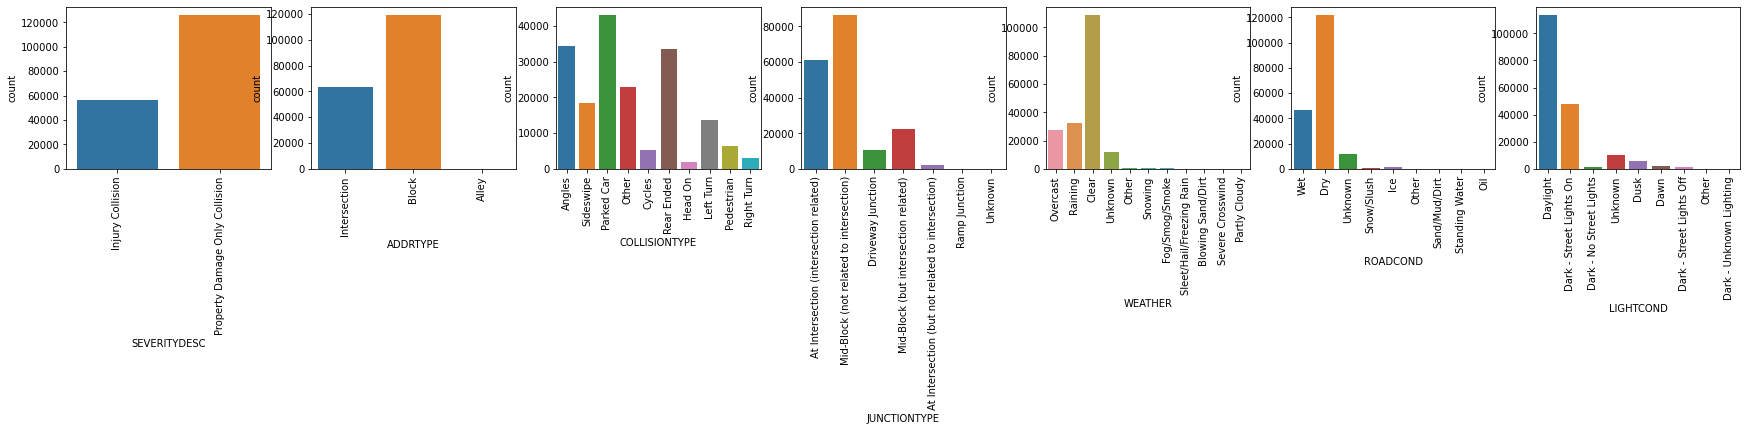

In [47]:
fig , ax = plt.subplots(1,7,figsize=(30,5))
for variable , subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    plt.subplots_adjust(bottom=0.3, top=0.75)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [48]:
correlation=df.corr()

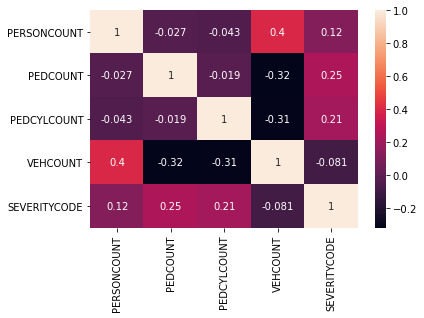

In [49]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

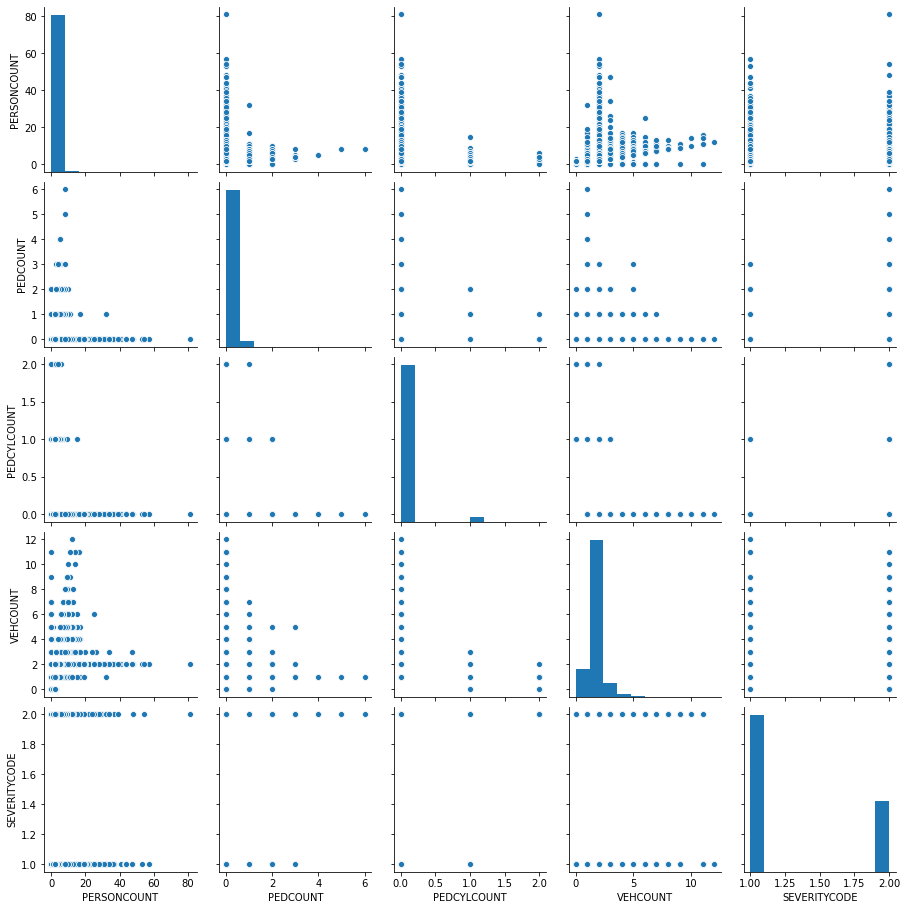

In [50]:
sns.pairplot(df)

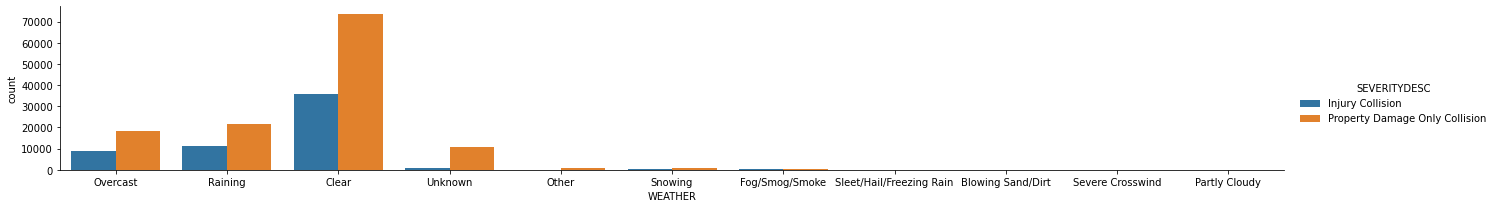

In [51]:
sns.catplot(x='WEATHER',kind='count', hue='SEVERITYDESC', data=df,height=3, aspect = 6)

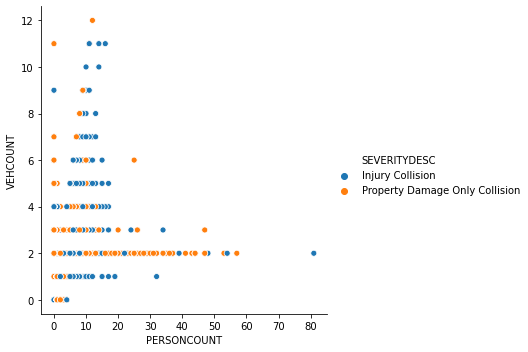

In [33]:
sns.relplot(x='PERSONCOUNT',y='VEHCOUNT',hue='SEVERITYDESC',data=df)

In [52]:
#Converting categorical variables into numerical veriables
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(df['ADDRTYPE'])
df['ADDRTYPE']= addrtype.transform(df['ADDRTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE']= jun.transform(df['JUNCTIONTYPE'])

weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER']= weathercond.transform(df['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND']= roadcond.transform(df['ROADCOND'])

light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND']= light.transform(df['LIGHTCOND'])



In [53]:
df.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,0,0,2,2,Injury Collision,2,Angles,1,4,8,5
1,2,0,0,2,1,Property Damage Only Collision,1,Sideswipe,4,6,8,2
2,4,0,0,3,1,Property Damage Only Collision,1,Parked Car,4,4,0,5
3,3,0,0,3,1,Property Damage Only Collision,1,Other,4,1,0,5
4,2,0,0,2,2,Injury Collision,2,Angles,1,6,8,5


## Predictive Modeling

### K-Nearest neighbors

In [54]:
X = df[['WEATHER','ROADCOND','LIGHTCOND','ADDRTYPE','JUNCTIONTYPE']].values.astype(float)
y = df['SEVERITYCODE'].values

In [55]:
from sklearn import preprocessing

In [56]:
#Data Standardization give data zero mean and unit variance, it is good practice
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146316, 5) (146316,)
Test set: (36579, 5) (36579,)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.6049987697859428
Test set Accuracy:  0.6013559692719866


In [61]:
ks = 25
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfusionMx = [];
for n in range(1,ks):
    
    #Training model using training dataset
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #Prediction using Test dataset
    yhat = neigh.predict(X_test)
    #Finding accuracy of the model by comparing actual and predicted values from test dataset
    mean_acc[n-1]= metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]= np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc
    

array([0.60135597, 0.67615298, 0.66412422, 0.67650838, 0.66860767,
       0.68591268, 0.67147817, 0.68181197, 0.67664507, 0.67847672,
       0.67552421, 0.678176  , 0.67790262, 0.67820334, 0.67705514,
       0.68268679, 0.68203067, 0.68337024, 0.68244074, 0.68282348,
       0.68233139, 0.68285082, 0.68285082, 0.68301484])

### Plot model accuracy for different number of Neighbors

NameError: name 'Ks' is not defined

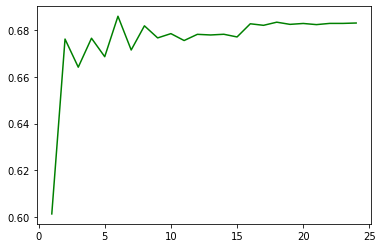

In [74]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [75]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6859126821400257 with k= 6


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Training model using Training dataset

In [70]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Prediction on testing dataset

In [71]:
pTree = dTree.predict(X_test)

In [72]:
print (pTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 2 1 1]


#### Evaluation

In [73]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pTree))

DecisionTrees's Accuracy:  0.6878536865414582


### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [77]:
#predicting values using test dataset
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
#predicting probability of 1 or 0 using test dataset
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.58760304, 0.41239696],
       [0.76175205, 0.23824795],
       [0.75544903, 0.24455097],
       ...,
       [0.55316008, 0.44683992],
       [0.75544903, 0.24455097],
       [0.75544903, 0.24455097]])

#### Model Evaluation using jaccard Index

In [80]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.6824328038256472

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss


In [88]:
print('Score:',metrics.accuracy_score(yhat,y_test))
print('F1-Score:',metrics.f1_score(yhat,y_test))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test,yhat))
print('')
print('Classification Report:')
print(classification_report(y_test,yhat))
print('')
print(log_loss(y_test, yhat_prob))

Score: 0.6841083681893982
F1-Score: 0.8112452423346456

Confusion Matrix:
[[24831   330]
 [11225   193]]

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.99      0.81     25161
           2       0.37      0.02      0.03     11418

    accuracy                           0.68     36579
   macro avg       0.53      0.50      0.42     36579
weighted avg       0.59      0.68      0.57     36579


0.5970357851007474


##### End of Notebook